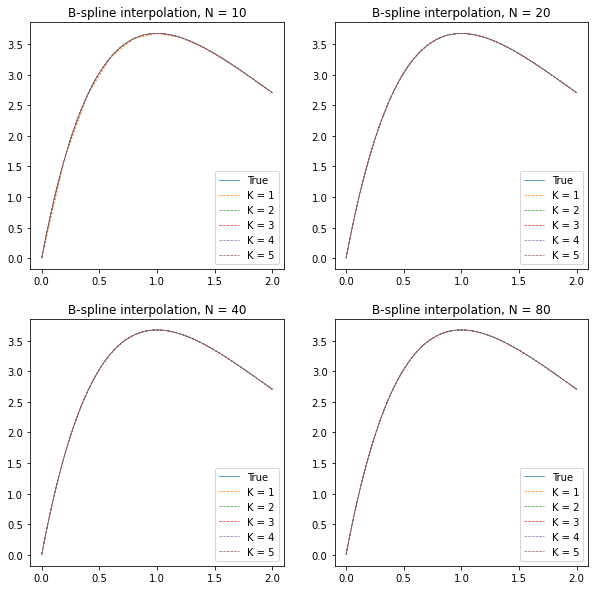

In [12]:
from __future__ import print_function
import numpy as np
from pyimsl.math.splineInterp import splineInterp
from pyimsl.math.splineValue import splineValue
from tabulate import tabulate
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['#', 'x', 'Interpolant', 'F(x)', 'Error']
error_headers =  ['N', 'Function Error'] 

def F(x):
    return 10 * x * pow(np.e, -x)


f = open('output.dat', "w", encoding="utf-8")
print('L9', file=f)
print('Danishevskii Danila, 3430302/90003', file=f)
print('Function: 10*x*e^(-x)', file=f)


a, b = 0, 2
N = 10
xVals = np.linspace(a, b, 100) #For true function graph
print('Interval: ['+ str(a) +', '+ str(b) +']', file=f)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
ax1.plot(xVals, F(xVals), linewidth=0.7, label='True')
ax2.plot(xVals, F(xVals), linewidth=0.7, label='True')
ax3.plot(xVals, F(xVals), linewidth=0.7, label='True')
ax4.plot(xVals, F(xVals), linewidth=0.7, label='True')

def getAxis(N):
    if N == 10:
        return ax1
    elif N == 20:
        return ax2
    elif N == 40:
        return ax3
    elif N == 80:
        return ax4


splineOrder = [1, 2, 3, 4, 5]
partitions = [10, 20, 40, 80]

j = 0
for k in splineOrder:
    print('\n\n\n\t\t\tSpline order: ' + str(k), file=f)
    max_errors = np.empty((4, 2))
    j = 0
    for N in partitions: # 10, 20, 40, 80 numbers of partitions
        print("\nNumber of Interpolation partitions: " + str(N), file=f)

        xdata = np.empty((N + 1))
        fdata = np.empty((N + 1))
        x = np.empty((N*8 + 1))
        s = np.empty((N*8 + 1))

        h = (b - a)/N
        h_x = (b - a)/(8 * N)

        for i in range(N+1):
            xdata[i] = a + i*h
            fdata[i] = F(xdata[i])

        for i in range(N*8 + 1):
            x[i] = a + i*h_x

        pp = splineInterp(xdata, fdata, order=k + 1)
        outputData = np.empty((N*8 + 1, 5))

        for i in range(N*8 + 1):
            ppVal = splineValue(x[i], pp)
            outputData[i] = np.array([i + 1, x[i], ppVal, F(x[i]), abs(F(x[i]) - ppVal)])
            s[i] = ppVal

        axis = getAxis(N)
        if axis:
            #axis.margins(x=0.01, y=-0.15)
            axis.plot(x, s, '--',linewidth=0.7, label='K = ' + str(k))
            axis.set_title('B-spline interpolation, N = ' + str(N))
            axis.legend()

        max_error = np.amax(outputData, axis=0)[4]
        max_errors[j] = np.array([N, max_error])

        table = tabulate(outputData, headers, tablefmt="fancy_grid", floatfmt=('.0f', '.2f', '.7f', '.7f', '.7e'))
        #print(table, file=f)
        


        print("\tMax error: " + '{:.7e}'.format(max_error), file=f)
        j += 1
    print("\n\nMax Errors", file=f)
    
    #for k in splineOrder:
    errorOutput = tabulate(max_errors, error_headers, tablefmt="fancy_grid", floatfmt=('.0f', '.7e', '.7e'))
    print(errorOutput, file=f)


    print("\nErrors' relations:", file=f)

    z = 0
    N = 10
    while(N <= 80):
        error_ratio = max_errors[z][1]/max_errors[z + 1][1]
        print('     Error(' + str(N) +')/Error(' + str(N*2) + ') = ' + str(error_ratio), file=f)
        z += 1
        N = N*2

        if z == 3:
            break

plt.show()
f.close()